170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3927 - loss: 1.6637 - val_accuracy: 0.6088 - val_loss: 1.1378
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6159 - loss: 1.0927 - val_accuracy: 0.6324 - val_loss: 1.0706
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6653 - loss: 0.9578 - val_accuracy: 0.6634 - val_loss: 0.9716
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7050 - loss: 0.8417 - val_accuracy: 0.6761 - val_loss: 0.9426
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7334 - loss: 0.7553 - val_accuracy: 0.6830 - val_loss: 0.9149
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7615 - loss: 0.6875 - val_accuracy: 0.6840 - val_loss: 0.9460
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7820 - loss: 0.6221 - val_accuracy: 0.6992 - val_loss: 0.9072
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8039 - loss: 0.5643

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3062 - loss: 1.8751 - val_accuracy: 0.5130 - val_loss: 1.3568
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4617 - loss: 1.4948 - val_accuracy: 0.5589 - val_loss: 1.2382
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5015 - loss: 1.3904 - val_accuracy: 0.5880 - val_loss: 1.1444
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5267 - loss: 1.3172 - val_accuracy: 0.5945 - val_loss: 1.1301
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.5492 - loss: 1.2609 - val_accuracy: 0.6131 - val_loss: 1.0993
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5594 - loss: 1.2423 - val_accuracy: 0.6284 - val_loss: 1.0430
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.5675 - loss: 1.2129 - val_accuracy: 0.6301 - val_loss: 1.0517
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5813 - loss: 1.17

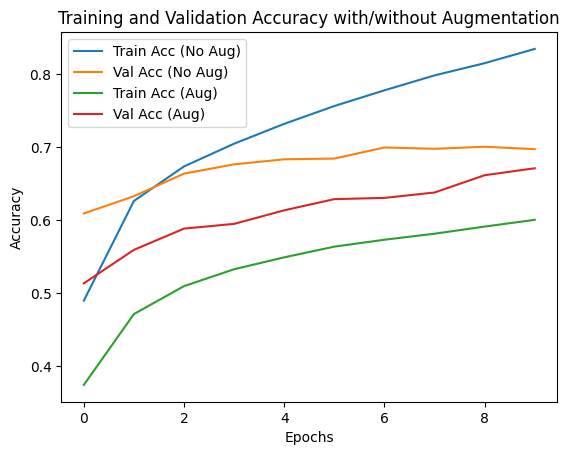

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)

# Define CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model Without Augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Train Model With Augmentation
model_aug = create_model()
history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=10)

# Plot Training and Validation Accuracy
plt.plot(history_no_aug.history['accuracy'], label='Train Acc (No Aug)')
plt.plot(history_no_aug.history['val_accuracy'], label='Val Acc (No Aug)')
plt.plot(history_aug.history['accuracy'], label='Train Acc (Aug)')
plt.plot(history_aug.history['val_accuracy'], label='Val Acc (Aug)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with/without Augmentation')
plt.show()